# 1.Problem Statement 

### Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# 2.Hypothesis Generation

# 3.Loading Packages and Data

In [239]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/internship/Train.csv
/kaggle/input/internship/Test.csv


# 4.Data Structure and Content

In [240]:
train_data = pd.read_csv('/kaggle/input/internship/Train.csv')
test_data = pd.read_csv('/kaggle/input/internship/Test.csv')

In [241]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [242]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [243]:
data = pd.concat([train_data, test_data], sort = False)
print(train_data.shape, test_data.shape, data.shape)

(8523, 12) (5681, 11) (14204, 12)


In [244]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [245]:
data.shape

(14204, 12)

In [246]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [247]:
data[data.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


## Categorical Features:                                  
* 1) Item_Identifier 
* 2) Item_Fat_Content 
* 3) Item_Type 
* 4) Outlet_Identifier
* 5) Outlet_Size
* 6) Outlet_Location_Type
* 7) Outlet_Type

In [249]:
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [250]:
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [251]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [252]:
data.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [253]:
data.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [254]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [255]:
data.dtypes == 'object'

Item_Identifier               True
Item_Weight                  False
Item_Fat_Content              True
Item_Visibility              False
Item_Type                     True
Item_MRP                     False
Outlet_Identifier             True
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type          True
Outlet_Type                   True
Item_Outlet_Sales            False
dtype: bool

In [256]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# 5.Exploratory Data Analysis

### handling inconsistencies:

In [257]:
#replacing Item_Fat_Content values for Low Fat with similar names:
data.Item_Fat_Content = data.Item_Fat_Content.replace(['LF','low fat'] , 'Low Fat')

In [258]:
#replacing Item_Fat_Content values for Regular with similar names:
data.Item_Fat_Content = data.Item_Fat_Content.replace(['reg'] , 'Regular')

In [259]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

# Handling Missing Values :

### Handling missing values of Item Weight :

<AxesSubplot:xlabel='Item_Weight'>

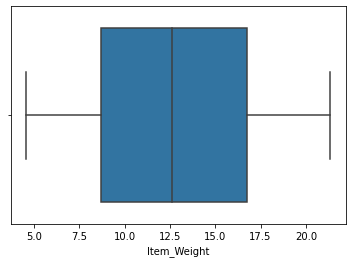

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x = 'Item_Weight', data = data)

In [261]:
print('Median of Item Weight :',data.Item_Weight.median())
print('Mean of Item Weight :',data.Item_Weight.mean())

Median of Item Weight : 12.6
Mean of Item Weight : 12.792854228644284


In [262]:
## Filling the missing values of Item Weight  with Median Value 
data['Item_Weight'].fillna(data['Item_Weight'].median() , inplace = True)

In [263]:
#checking for missing values in Item Weight :
data.Item_Weight.isna().sum()

0

### Handling Missing values of Outlet Size :

In [264]:
data.Outlet_Size.isna().sum()

4016

In [265]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [266]:
#getting mode of Outlet Size 
mode_of_outlet_size = data.pivot_table(values = "Outlet_Size",columns = "Outlet_Type", aggfunc = (lambda x : x.mode()[0]))

In [267]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [268]:
missing_outlet_size = data.Outlet_Size.isnull()
missing_outlet_size

0       False
1       False
2       False
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 14204, dtype: bool

In [269]:
# Filling the missing values in Outlet Size with the mode value :
data.loc[missing_outlet_size , 'Outlet_Size'] = data.loc[missing_outlet_size,'Outlet_Type'].apply(lambda x :mode_of_outlet_size[x])

In [270]:
data.Outlet_Size.value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

In [271]:
data['Outlet_Size'] = data['Outlet_Size'].replace({'[Grocery Store]':'Small'})

In [272]:
#checking for missing outlet size values :
data.Outlet_Size.isna().sum()

0

### Handling Item Outlet Sales

In [273]:
data.Item_Outlet_Sales.isna().sum()

5681

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Item_Outlet_Sales'>

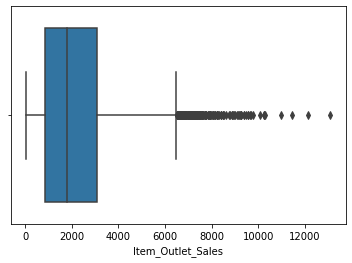

In [274]:
sns.boxplot(data['Item_Outlet_Sales'])

#### As we have a lot of outliers present , substituting the missing values without treating outliers will be of no use

#### Replace the outlier value using the IQR

In [275]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [276]:
low, high = remove_outlier(data['Item_Outlet_Sales'])

In [277]:
data['Item_Outlet_Sales'] = np.where(data['Item_Outlet_Sales']<low , low , data['Item_Outlet_Sales'])
data['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
5676          NaN
5677          NaN
5678          NaN
5679          NaN
5680          NaN
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [278]:
data['Item_Outlet_Sales'] = np.where(data['Item_Outlet_Sales']>high ,high , data['Item_Outlet_Sales'])
data['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
5676          NaN
5677          NaN
5678          NaN
5679          NaN
5680          NaN
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Item_Outlet_Sales'>

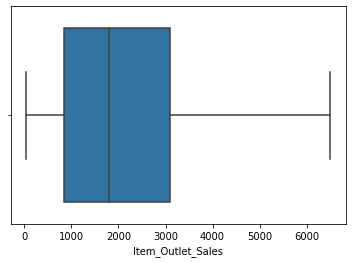

In [279]:
sns.boxplot(data['Item_Outlet_Sales'])

#### we have now handled the outliers using the iqr method, now we will fill in the missing values:

In [280]:
# replacing the missing values of Sales;
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mean(), inplace = True)


In [281]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.759739,0.065953,141.004977,1997.830681,2156.313016
std,4.234851,0.051459,62.086938,8.371664,1258.628290
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,1468.089000
50%,12.600000,0.054021,142.247000,1999.000000,2156.313016
75%,16.000000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,6501.869900


#### We noticed that the item visibility is 0 which is not practically possible so we will handle that as follows:

In [282]:
data.Item_Visibility.mean()

0.06595278007399324

In [283]:
data.loc[data['Item_Visibility']==0,'Item_Visibility']=data.Item_Visibility.mean()

In [284]:
data['Item_Visibility'].value_counts()

0.065953    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [285]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [286]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [287]:
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

In [288]:
data.Item_Fat_Content.value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [289]:
# Year:
data.Outlet_Establishment_Year.value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

# 6.Univariate Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

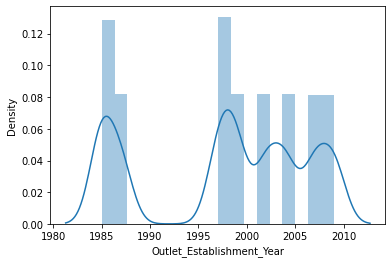

In [290]:
sns.distplot(data.Outlet_Establishment_Year)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

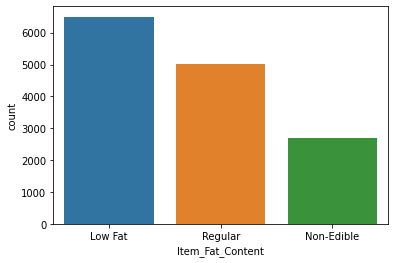

In [291]:
sns.countplot(data.Item_Fat_Content)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

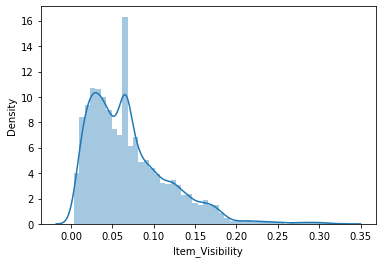

In [292]:
sns.distplot(data['Item_Visibility'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

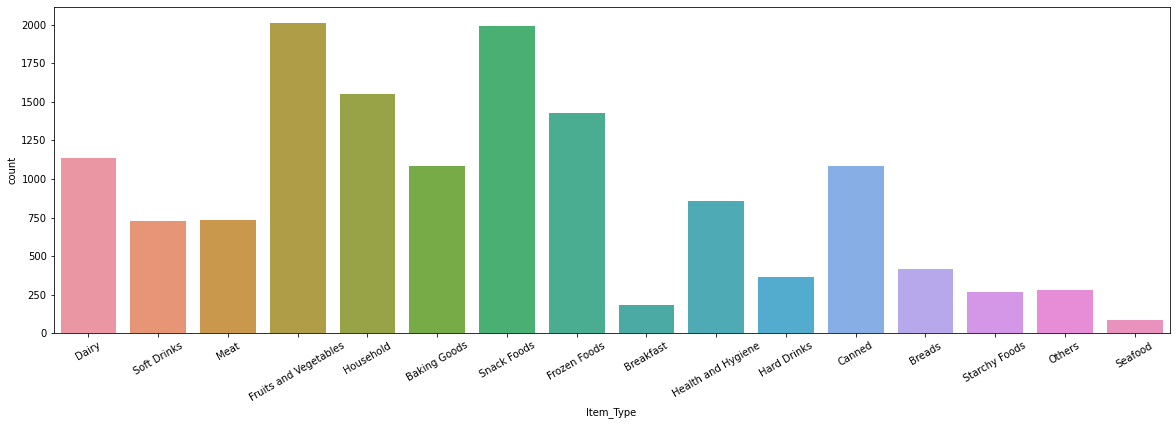

In [293]:
plt.figure(figsize = (20,6))
sns.countplot(data.Item_Type)
plt.xticks(rotation = 30)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

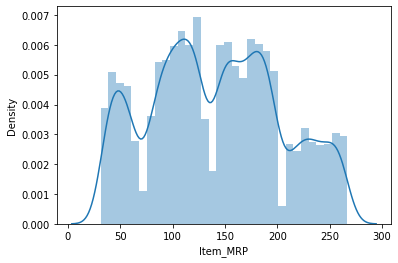

In [294]:
sns.distplot(data.Item_MRP)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

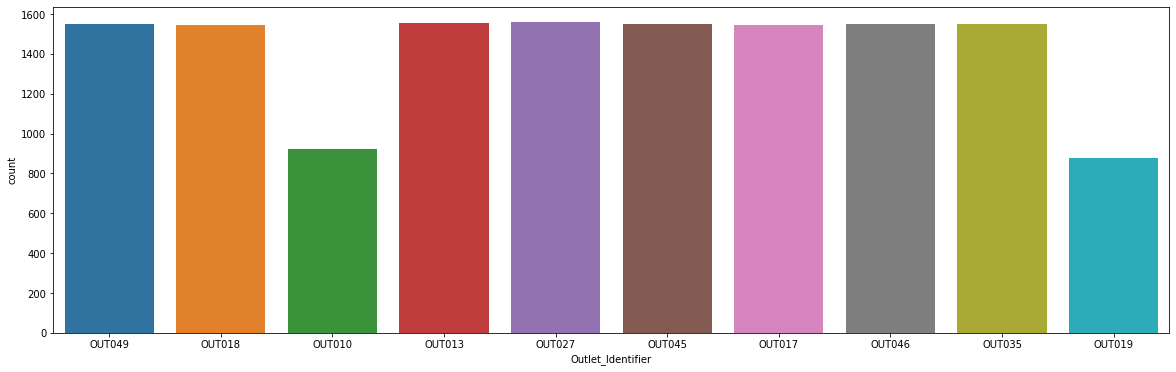

In [295]:
plt.figure(figsize = (20,6))
sns.countplot(data.Outlet_Identifier)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

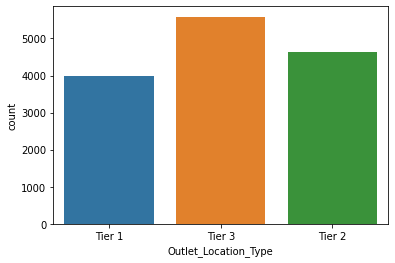

In [296]:
sns.countplot(data.Outlet_Location_Type)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

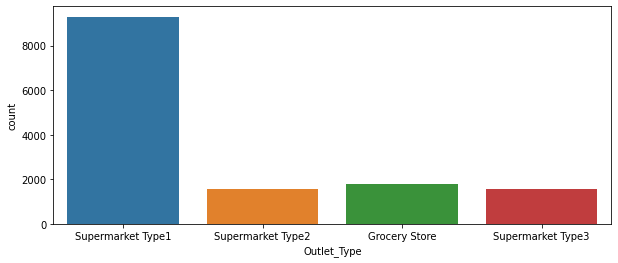

In [297]:
plt.figure(figsize = (10,4))
sns.countplot(data.Outlet_Type)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

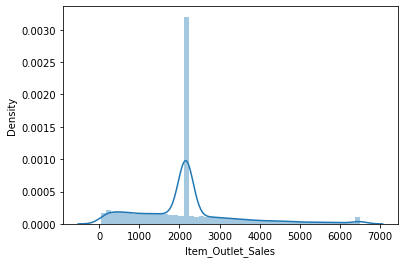

In [298]:
sns.distplot(data.Item_Outlet_Sales)

# 7.Bivariate Analysis

<AxesSubplot:>

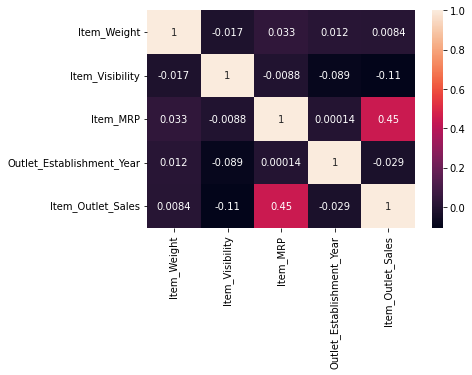

In [299]:
sns.heatmap(data.corr(), annot = True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


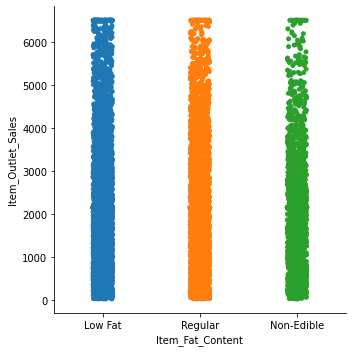

In [300]:
#scatter plot:
sns.catplot("Item_Fat_Content","Item_Outlet_Sales",  data = data, hue = "Item_Fat_Content" )

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 52.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/pyth

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

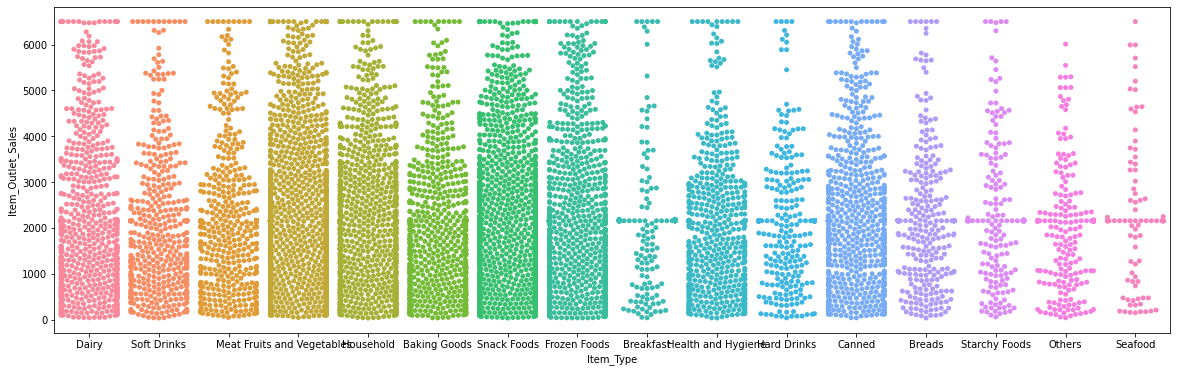

In [301]:
plt.figure(figsize=(20,6))
sns.swarmplot("Item_Type", "Item_Outlet_Sales", data= data)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

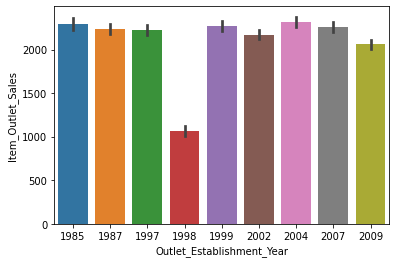

In [302]:
sns.barplot("Outlet_Establishment_Year","Item_Outlet_Sales", data=data)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


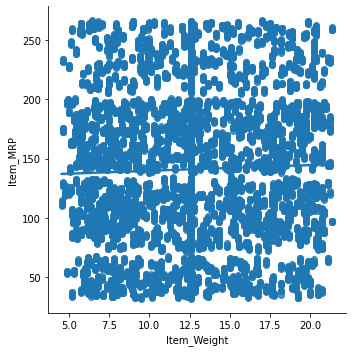

In [303]:
sns.lmplot("Item_Weight", "Item_MRP", data = data)

In [304]:
#sns.swarmplot(data=data, y="Item_Outlet_Sales", x="Outlet_Type", hue="Outlet_Type")

# 8.Missing Value Treatment

In [305]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Type_Combined           0
dtype: int64

# 9.Feature Engineering

In [306]:
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [307]:
from sklearn.model_selection import train_test_split
y = data.Item_Outlet_Sales
X = data.drop('Item_Outlet_Sales', axis = 1)

In [308]:
print(X.shape)
print(y.shape)

(14204, 13)
(14204,)


##### performing train test split:

In [309]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# 10.Encoding Categorical Variables

##### Categorical Features:
* 1) Item_Identifier
* 2) Item_Fat_Content
* 3) Item_Type
* 4) Outlet_Identifier
* 5) Outlet_Size
* 6) Outlet_Location_Type
* 7) Outlet_Type

In [310]:
categorical_col = [col for col in X_train.columns if X_train[col].dtype == 'object']

In [311]:
low_cardinality_col = [col for col in X_train.columns if X_train[col].nunique() < 10 and X_train[col].dtype =='object']


In [312]:
numeric_col = [col for col in X_train.columns if X_train[col].dtype in ['int64','float64']]
numeric_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Years']

In [313]:
high_cardinality_col = list(set(categorical_col)-set(low_cardinality_col))
print('Categorical columns that will be one-hot encoded:', low_cardinality_col)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_col)

Categorical columns that will be one-hot encoded: ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined']

Categorical columns that will be dropped from the dataset: ['Item_Type', 'Outlet_Identifier', 'Item_Identifier']


In [314]:
# creating copies of x_train and all:
X_t = X_train.copy()
X_v = X_test.copy()
y_t = y_train.copy()
y_v = y_test.copy()

# 11. Label Encoding

In [315]:
# converting the low cardinality cols with one hot encoder and the one with higher cardinality with label encoder :
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in high_cardinality_col:
    X_t[i] = lb.fit_transform(X_t[i])
    X_v[i] = lb.fit_transform(X_v[i])

In [316]:
X_t.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years
3719,246,11.50,Regular,0.020602,4,86.0540,9,1999,Medium,Tier 1,Supermarket Type1,Food,14
4179,721,13.15,Regular,0.037946,13,89.1856,6,2004,Small,Tier 2,Supermarket Type1,Food,9
2335,797,14.00,Regular,0.060427,5,153.5656,8,1997,Small,Tier 1,Supermarket Type1,Food,16
3749,1179,18.25,Regular,0.171174,4,156.4630,7,2002,Small,Tier 2,Supermarket Type1,Food,11
5967,1421,12.60,Non-Edible,0.073013,11,67.5142,5,1985,Medium,Tier 3,Supermarket Type3,Non-Consumable,28


# 12.One-Hot Encoder:

In [317]:
from sklearn.preprocessing import OneHotEncoder

model = OneHotEncoder(handle_unknown = "ignore", sparse = False)
OH_X_t = pd.DataFrame(model.fit_transform(X_t[low_cardinality_col])) # Your code here
OH_X_v = pd.DataFrame(model.transform(X_v[low_cardinality_col])) # Your code here
# One-hot encoding removed index; put it back
OH_X_t.index = X_t.index
OH_X_v.index = X_v.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_t = X_t.drop(categorical_col, axis=1)
num_X_v = X_v.drop(categorical_col, axis=1)

# Add one-hot encoded columns to numerical features
X_t = pd.concat([num_X_t, OH_X_t], axis=1)
X_v = pd.concat([num_X_v, OH_X_v], axis=1)


In [318]:
OH_X_t.dtypes.value_counts()

float64    16
dtype: int64

# 13.PreProcessing Data

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [319]:
# feature scaling:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit_transform(X_t)
print(model)

StandardScaler()


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# 14.Modeling

#### Here we will be using various models an test their scores:

# 15.LinearRegression

In [320]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
regressor = LinearRegression()
regressor.fit(X_t, y_t)
preds = regressor.predict(X_v)
score = mean_absolute_error(y_v, preds)
print("MAE:", score)

MAE: 798.7151689946782


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# 16. Regularized Linear Regression

* Ridge:

In [321]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as MSE
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_v, y_v)
y_pred = ridgeR.predict(X_v)
 
# calculate mean square error
#mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
rmse = np.sqrt(MSE(y_v, preds))
print("RMSE : % f" %(rmse))
print("MAE : ", mean_absolute_error(y_v, preds))
#print(mean_squared_error_ridge)

RMSE :  1044.849916
MAE :  798.7151689946782


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


* lasso

In [322]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_t, y_t)
#
# Create the model score
#
#lasso.score(X_v, y_v), lasso.score(X_t, y_t)
rmse = np.sqrt(MSE(y_v, preds))
print("RMSE : % f" %(rmse))
print("MAE : ", mean_absolute_error(y_v, preds))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RMSE :  1044.849916
MAE :  798.7151689946782


* ElasticNet

In [323]:

# import model
from sklearn.linear_model import ElasticNet
 
# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(X_t, y_t)
 
# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_v)
#mean_squared_error = np.mean((y_pred_elastic - y_v)**2)
#print("Mean Absolute Error on test set", mean_absolute_error(y_v,y_pred_elastic))
rmse = np.sqrt(MSE(y_v, preds))
print("RMSE : % f" %(rmse))
print("MAE : ", mean_absolute_error(y_v, preds))

RMSE :  1044.849916
MAE :  798.7151689946782


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# 17. Random Forest Regressor:

In [324]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_t, y_t) 
preds = regressor.predict(X_v)
score = mean_absolute_error(y_v, preds)
print("MAE score : ", score)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


MAE score :  840.153466782884


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# 18. XGBoost 

In [325]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

model = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
model.fit(X_t, y_t)
  
# Predict the model
preds = model.predict(X_v)

score1 = mean_absolute_error(y_v, preds)
print("MAE score : ", score1)
# RMSE Computation
rmse = np.sqrt(MSE(y_v, preds))
print("RMSE : % f" %(rmse))


[11:14:54] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
MAE score :  796.405206976594
RMSE :  1037.014330


# 19. Summary

xgboost had a lower mean absolute error than the others , hence this is the best model.